# Wine Quality Classification

## Dataset Description

This dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. More about this dataset: https://archive.ics.uci.edu/ml/datasets/wine

#### Dataset Features
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

In [1]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import metrics as skmetrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [2]:
wine_quality_url = 'https://github.com/stubbsdiondra/PortfolioProjects/raw/main/Wine%20Quality%20Project/wine.csv'
wine_df = pd.read_csv(wine_quality_url)
wine_df

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.40  1050  
1    3.17  1185  
2    3.45  1480  
3    2.93   735  
4    2.85  1450  
..    ...   ...  
172  1.74   740  
173  1.56   750  
174  1.56   835  
175  1.62   840  
176  1.60   560  

[177 rows x 14 columns]

In [3]:
columns = ['quality','Alcohol','Malic_acid','Ash','Alcalinity',
          'Magnesium','Total_phenols','Flavanoids',
          'Nonflavanoid_phenols','Proanthocyanins',
          'Color_intensity','Hue','OD280_OD315',
          'Proline']

wine_df = wine_df = pd.read_csv(wine_quality_url, names = columns, sep = ',', header = None)

In [4]:
wine_df

quality  Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
0          1    14.23        1.71  2.43        15.6        127           2.80   
1          1    13.20        1.78  2.14        11.2        100           2.65   
2          1    13.16        2.36  2.67        18.6        101           2.80   
3          1    14.37        1.95  2.50        16.8        113           3.85   
4          1    13.24        2.59  2.87        21.0        118           2.80   
..       ...      ...         ...   ...         ...        ...            ...   
173        3    13.71        5.65  2.45        20.5         95           1.68   
174        3    13.40        3.91  2.48        23.0        102           1.80   
175        3    13.27        4.28  2.26        20.0        120           1.59   
176        3    13.17        2.59  2.37        20.0        120           1.65   
177        3    14.13        4.10  2.74        24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280_OD315  Proline  
0           3.92     1065  
1           3.40     1050  
2           3.17     1185  
3           3.45     1480  
4           2.93      735  
..           ...      ...  
173         1.74      740  
174         1.56      750  
175         1.56      835  
176         1.62      840  
177         1.60      560  

[178 rows x 14 columns]

## Classification Task
The task is to predict the quality of the wine from the measurements. I am going to attempt building an automatic wine classifier that, for measurements of a new wine returns the predicted quality. 

The DataFrame has columns for quality, alcohol,	malic acid, ash, alcalinity, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color intensity, hue, OD280_OD315, and proline. The target variable (chosen classifier) will be the quality of the wine.

In [7]:
feature_vars = columns
target_var = 'quality'

## Exploratory Data Analysis

In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity            178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
wine_df.describe()

quality     Alcohol  Malic_acid         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_intensity         Hue  OD280_OD315      Proline  
count       178.000000  178.000000   178.000000   178.000000  
mean          5.058090    0.957449     2.611685   746.893258  
std           2.318286    0.228572     0.709990   314.907474  
min           1.280000    0.480000     1.270000   278.000000  
25%           3.220000    0.782500     1.937500   500.500000  
50%           4.690000    0.965000     2.780000   673.500000  
75%           6.200000    1.120000     3.170000   985.000000  
max          13.000000    1.710000     4.000000  1680.000000

In [10]:
wine_df['quality'].value_counts()

2    71
1    59
3    48
Name: quality, dtype: int64

Here we will look at the distribution of features. This pair plot shows the distribution of the target variable quality. 

There is not a ton of overlap for the different qualities of each wine. I would like to assume that the data is reasonably seperable. The features mostly are shaped like symmetrical bell curves and their are no skewed distributions. Therefore the features are normally (Gaussian) distributed. 

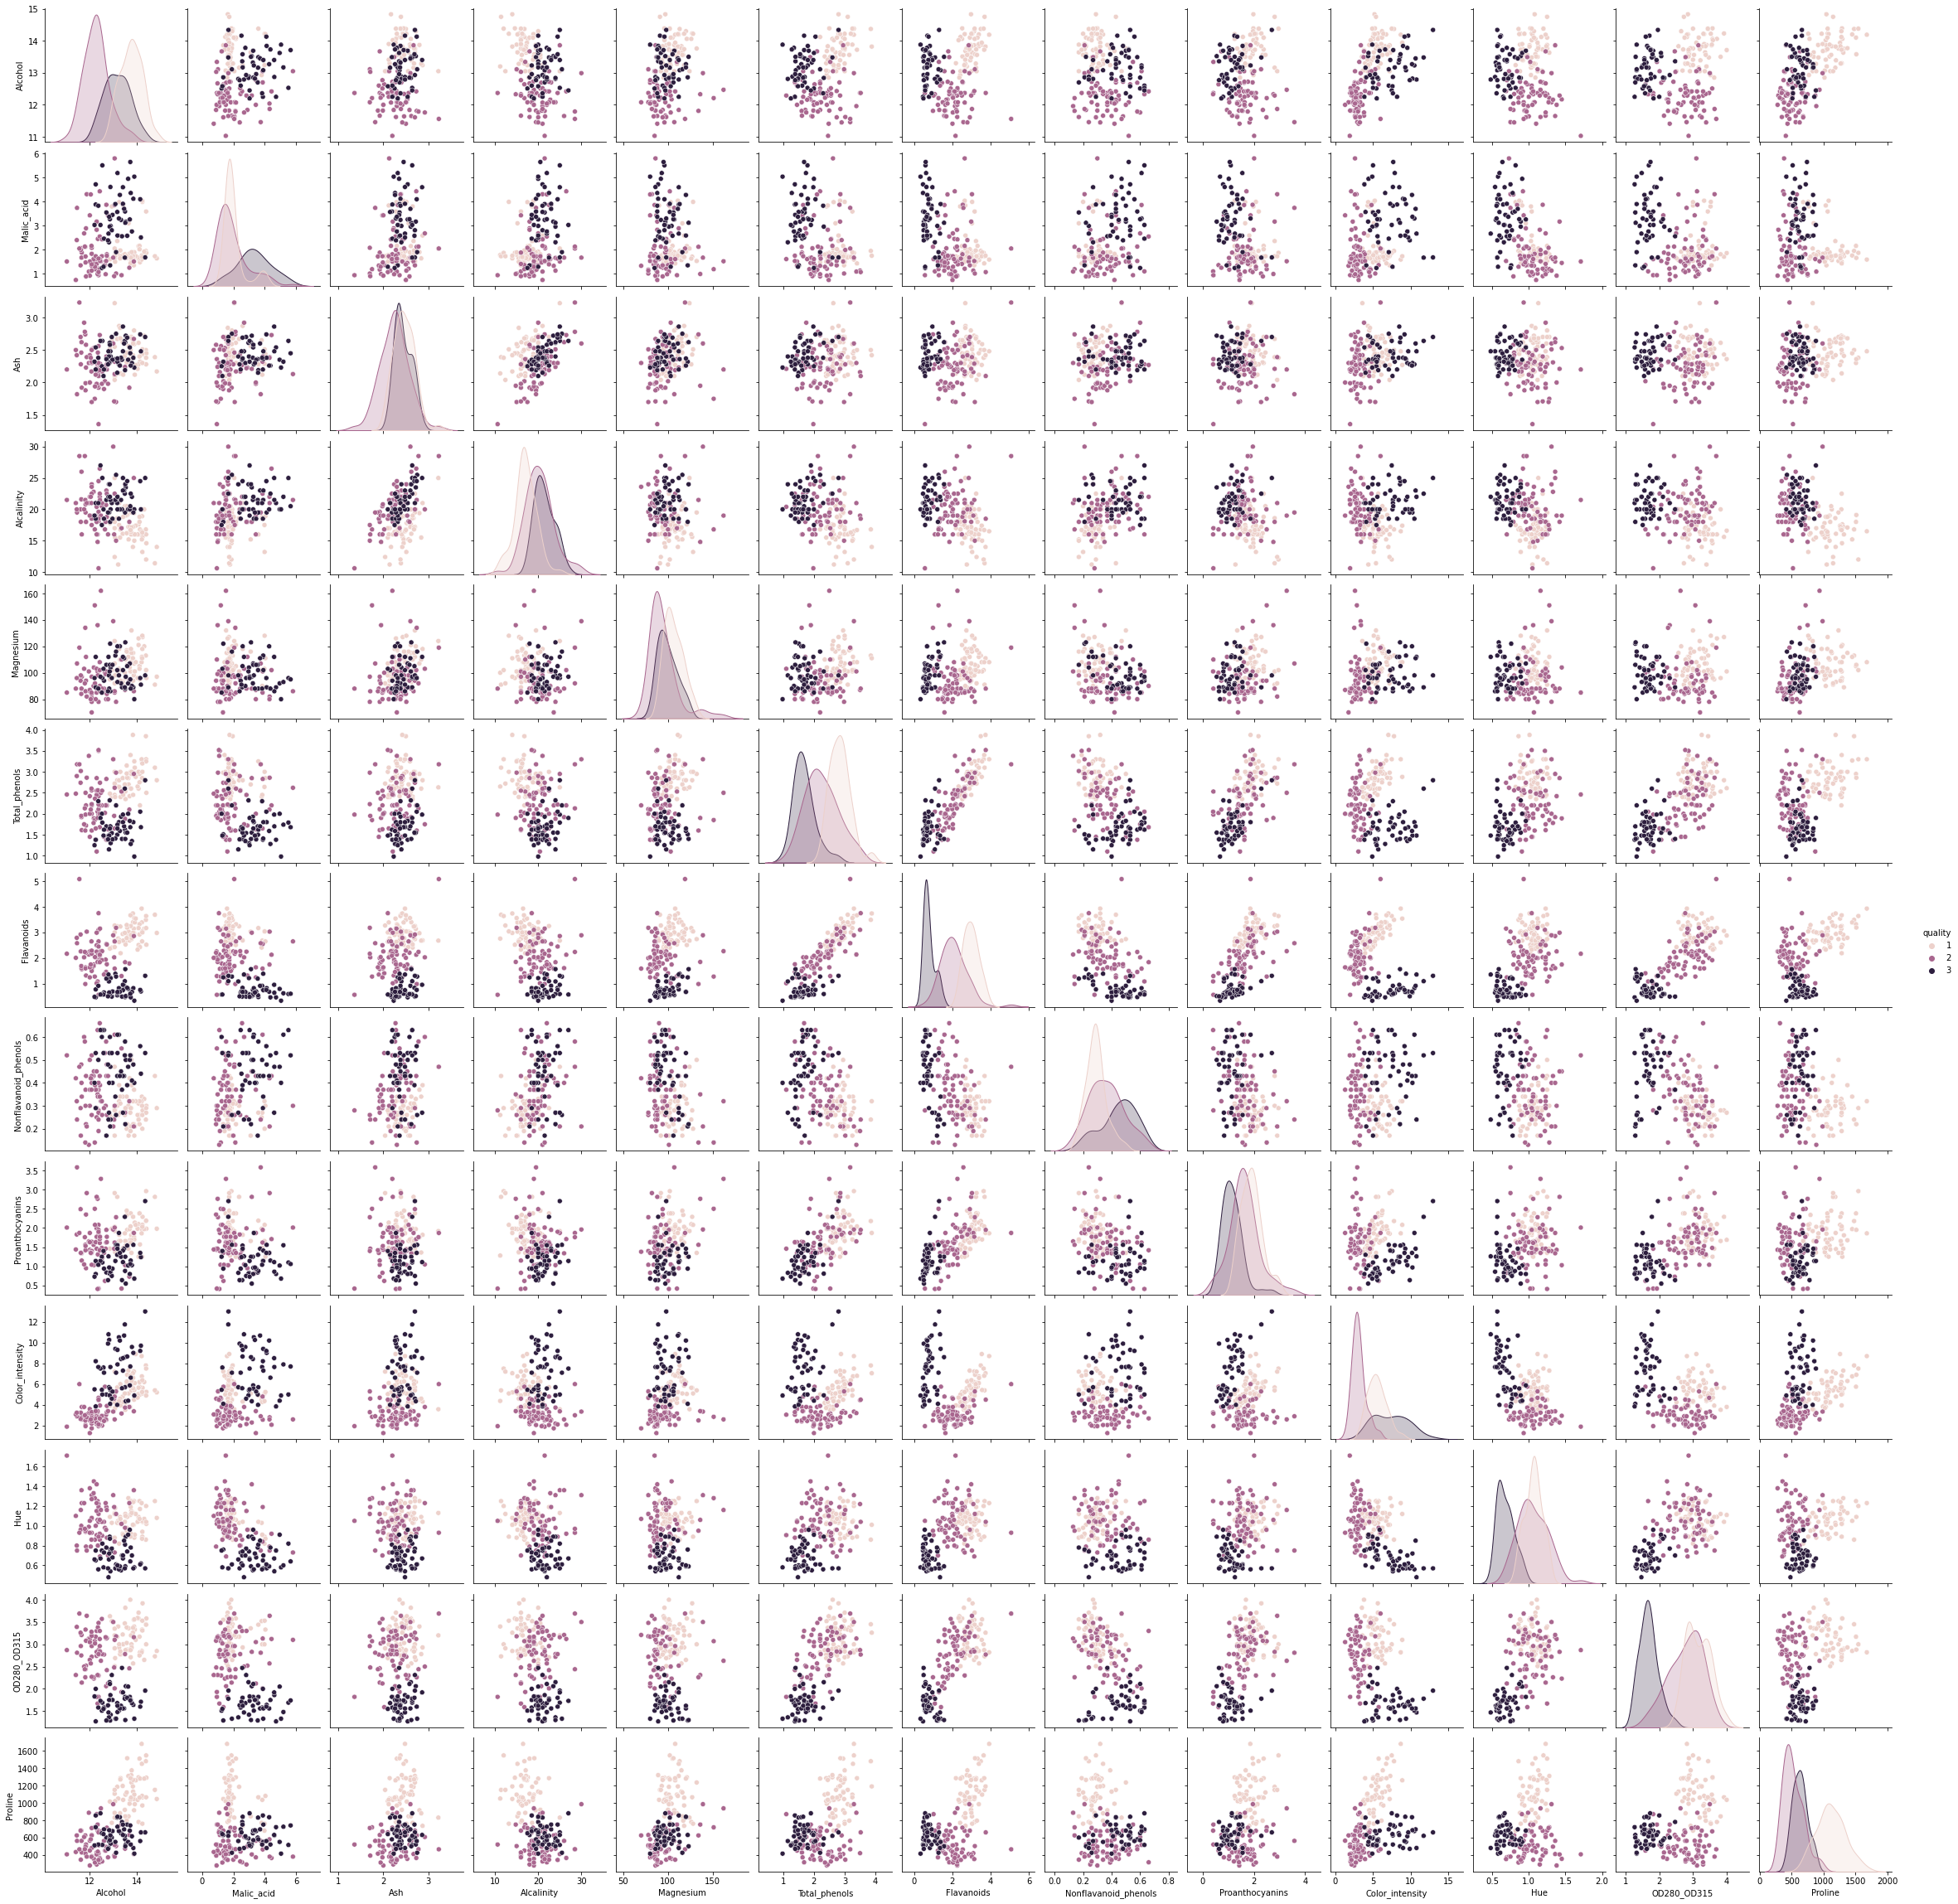

In [11]:
sns.pairplot(data = wine_df, hue = target_var)

Gaussian Naive Bayes is a more reasonable model since the features are normally distributed.

## Classification

In [12]:
X_train, X_test, y_train, y_test = train_test_split(wine_df[feature_vars],wine_df[target_var], test_size = 0.5, random_state=0)

In [13]:
X_test.shape

(89, 14)

In [14]:
X_train.head()

quality  Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
69        2    12.21        1.19  1.75        16.8        151           1.85   
49        1    13.94        1.73  2.27        17.4        108           2.88   
48        1    14.10        2.02  2.40        18.8        103           2.75   
85        2    12.67        0.98  2.24        18.0         99           2.20   
13        1    14.75        1.73  2.39        11.4         91           3.10   

    Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
69        1.28                  0.14             2.50             2.85  1.28   
49        3.54                  0.32             2.08             8.90  1.12   
48        2.92                  0.32             2.38             6.20  1.07   
85        1.94                  0.30             1.46             2.62  1.23   
13        3.69                  0.43             2.81             5.40  1.25   

    OD280_OD315  Proline  
69         3.07      718  
49         3.10     1260  
48         2.75     1060  
85         3.16      450  
13         2.73     1150

In [15]:
wine_df.head()

quality  Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
0        1    14.23        1.71  2.43        15.6        127           2.80   
1        1    13.20        1.78  2.14        11.2        100           2.65   
2        1    13.16        2.36  2.67        18.6        101           2.80   
3        1    14.37        1.95  2.50        16.8        113           3.85   
4        1    13.24        2.59  2.87        21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280_OD315  Proline  
0         3.92     1065  
1         3.40     1050  
2         3.17     1185  
3         3.45     1480  
4         2.93      735

In [16]:
X_train.shape, wine_df.shape

((89, 14), (178, 14))

In [17]:
89/178

0.5

We get 50% of the samples in the training set

In [18]:
gnb = GaussianNB()

In [20]:
gnb.fit(X_train,y_train)

GaussianNB()

Fitting the Gaussian Naive Bayes

In [21]:
gnb.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'n_features_in_': 14,
 'epsilon_': 9.661248049488699e-05,
 'classes_': array([1, 2, 3], dtype=int64),
 'theta_': array([[1.00000000e+00, 1.37741176e+01, 1.98647059e+00, 2.45823529e+00,
         1.66764706e+01, 1.05441176e+02, 2.85852941e+00, 3.00529412e+00,
         2.91176471e-01, 1.89588235e+00, 5.58676471e+00, 1.07176471e+00,
         3.17705882e+00, 1.11211765e+03],
        [2.00000000e+00, 1.22270968e+01, 1.81225806e+00, 2.24096774e+00,
         2.03580645e+01, 9.53870968e+01, 2.10612903e+00, 1.94838710e+00,
         3.81935484e-01, 1.61645161e+00, 2.99516129e+00, 1.08019355e+00,
         2.79612903e+00, 5.30419355e+02],
        [3.00000000e+00, 1.31383333e+01, 3.45416667e+00, 2.48791667e+00,
         2.20625000e+01, 1.00625000e+02, 1.69000000e+00, 8.12916667e-01,
         4.41250000e-01, 1.10208333e+00, 7.08291667e+00, 6.89166667e-01,
         1.65791667e+00, 6.19375000e+02]]),
 'sigma_': array([[9.66124805e-05, 2.06756128e-01, 4.6874886

In [22]:
# Using EDA to find the mean and variance of each feature for each quality
wine_grouped = wine_df.groupby('quality')

In [23]:
wine_grouped[columns].mean()

quality    Alcohol  Malic_acid       Ash  Alcalinity   Magnesium  \
quality                                                                     
1            1.0  13.744746    2.010678  2.455593   17.037288  106.338983   
2            2.0  12.278732    1.932676  2.244789   20.238028   94.549296   
3            3.0  13.153750    3.333750  2.437083   21.416667   99.312500   

         Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
quality                                                                     
1             2.840169    2.982373              0.290000         1.899322   
2             2.258873    2.080845              0.363662         1.630282   
3             1.678750    0.781458              0.447500         1.153542   

         Color_intensity       Hue  OD280_OD315      Proline  
quality                                                       
1               5.528305  1.062034     3.157797  1115.711864  
2               3.086620  1.056282     2.785352   519.507042  
3               7.396250  0.682708     1.683542   629.895833

In [24]:
wine_grouped[columns].var()

quality   Alcohol  Malic_acid       Ash  Alcalinity   Magnesium  \
quality                                                                    
1            0.0  0.213560    0.474100  0.051604    6.483758  110.227937   
2            0.0  0.289406    1.031380  0.099520   11.220962  280.679678   
3            0.0  0.281156    1.183539  0.034110    5.099291  118.602394   

         Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
quality                                                                     
1             0.114895    0.158001              0.004907         0.169834   
2             0.297419    0.498014              0.015366         0.362486   
3             0.127428    0.086145              0.015411         0.167147   

         Color_intensity       Hue  OD280_OD315       Proline  
quality                                                        
1               1.534063  0.013568     0.127504  49071.450029  
2               0.855494  0.041183     0.246585  24715.367807  
3               5.340454  0.013097     0.074045  13247.329344

This model has an accuracy score of ~ 94%.

In [25]:
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

1.0

In [26]:
y_pred = gnb.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred) 

array([[25,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 24]], dtype=int64)

This Gaussian Naive Bayes Classifier model works well meaning that the parameters fit the data well.

In [31]:
# generating synthetic data
N = 20
gnb_df = pd.DataFrame(np.concatenate([np.random.multivariate_normal(th, sig*np.eye(14),N)
         for th, sig in zip(gnb.theta_,gnb.sigma_)]),
         columns = feature_vars)
gnb_df['quality'] = [ci for cl in [[c]*N for c in gnb.classes_] for ci in cl]

In [32]:
gnb_df.head()

quality    Alcohol  Malic_acid       Ash  Alcalinity   Magnesium  \
0        1  13.392783    2.831564  2.603639   15.862019   94.256606   
1        1  13.431844    1.983615  2.008716   19.740944  110.329987   
2        1  13.215916    2.376503  2.789409   18.770369  108.568419   
3        1  13.607677    3.138714  2.462751   13.231654  102.422342   
4        1  13.530668    1.539863  2.454017   13.807650  106.648631   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       3.085264    3.065060              0.247014         2.025504   
1       3.125473    3.229527              0.282033         1.831438   
2       2.595272    2.654604              0.325525         2.376803   
3       2.850090    3.091674              0.242069         1.310034   
4       3.178463    2.225886              0.316766         1.301773   

   Color_intensity       Hue  OD280_OD315      Proline  
0         6.446272  1.011580     3.209108  1103.484756  
1         6.165810  0.990561     3.162519  1189.969161  
2         4.233359  1.214475     2.766950   879.189227  
3         4.708447  1.280767     3.684812   993.369276  
4         3.804378  1.125408     3.200839  1411.079437

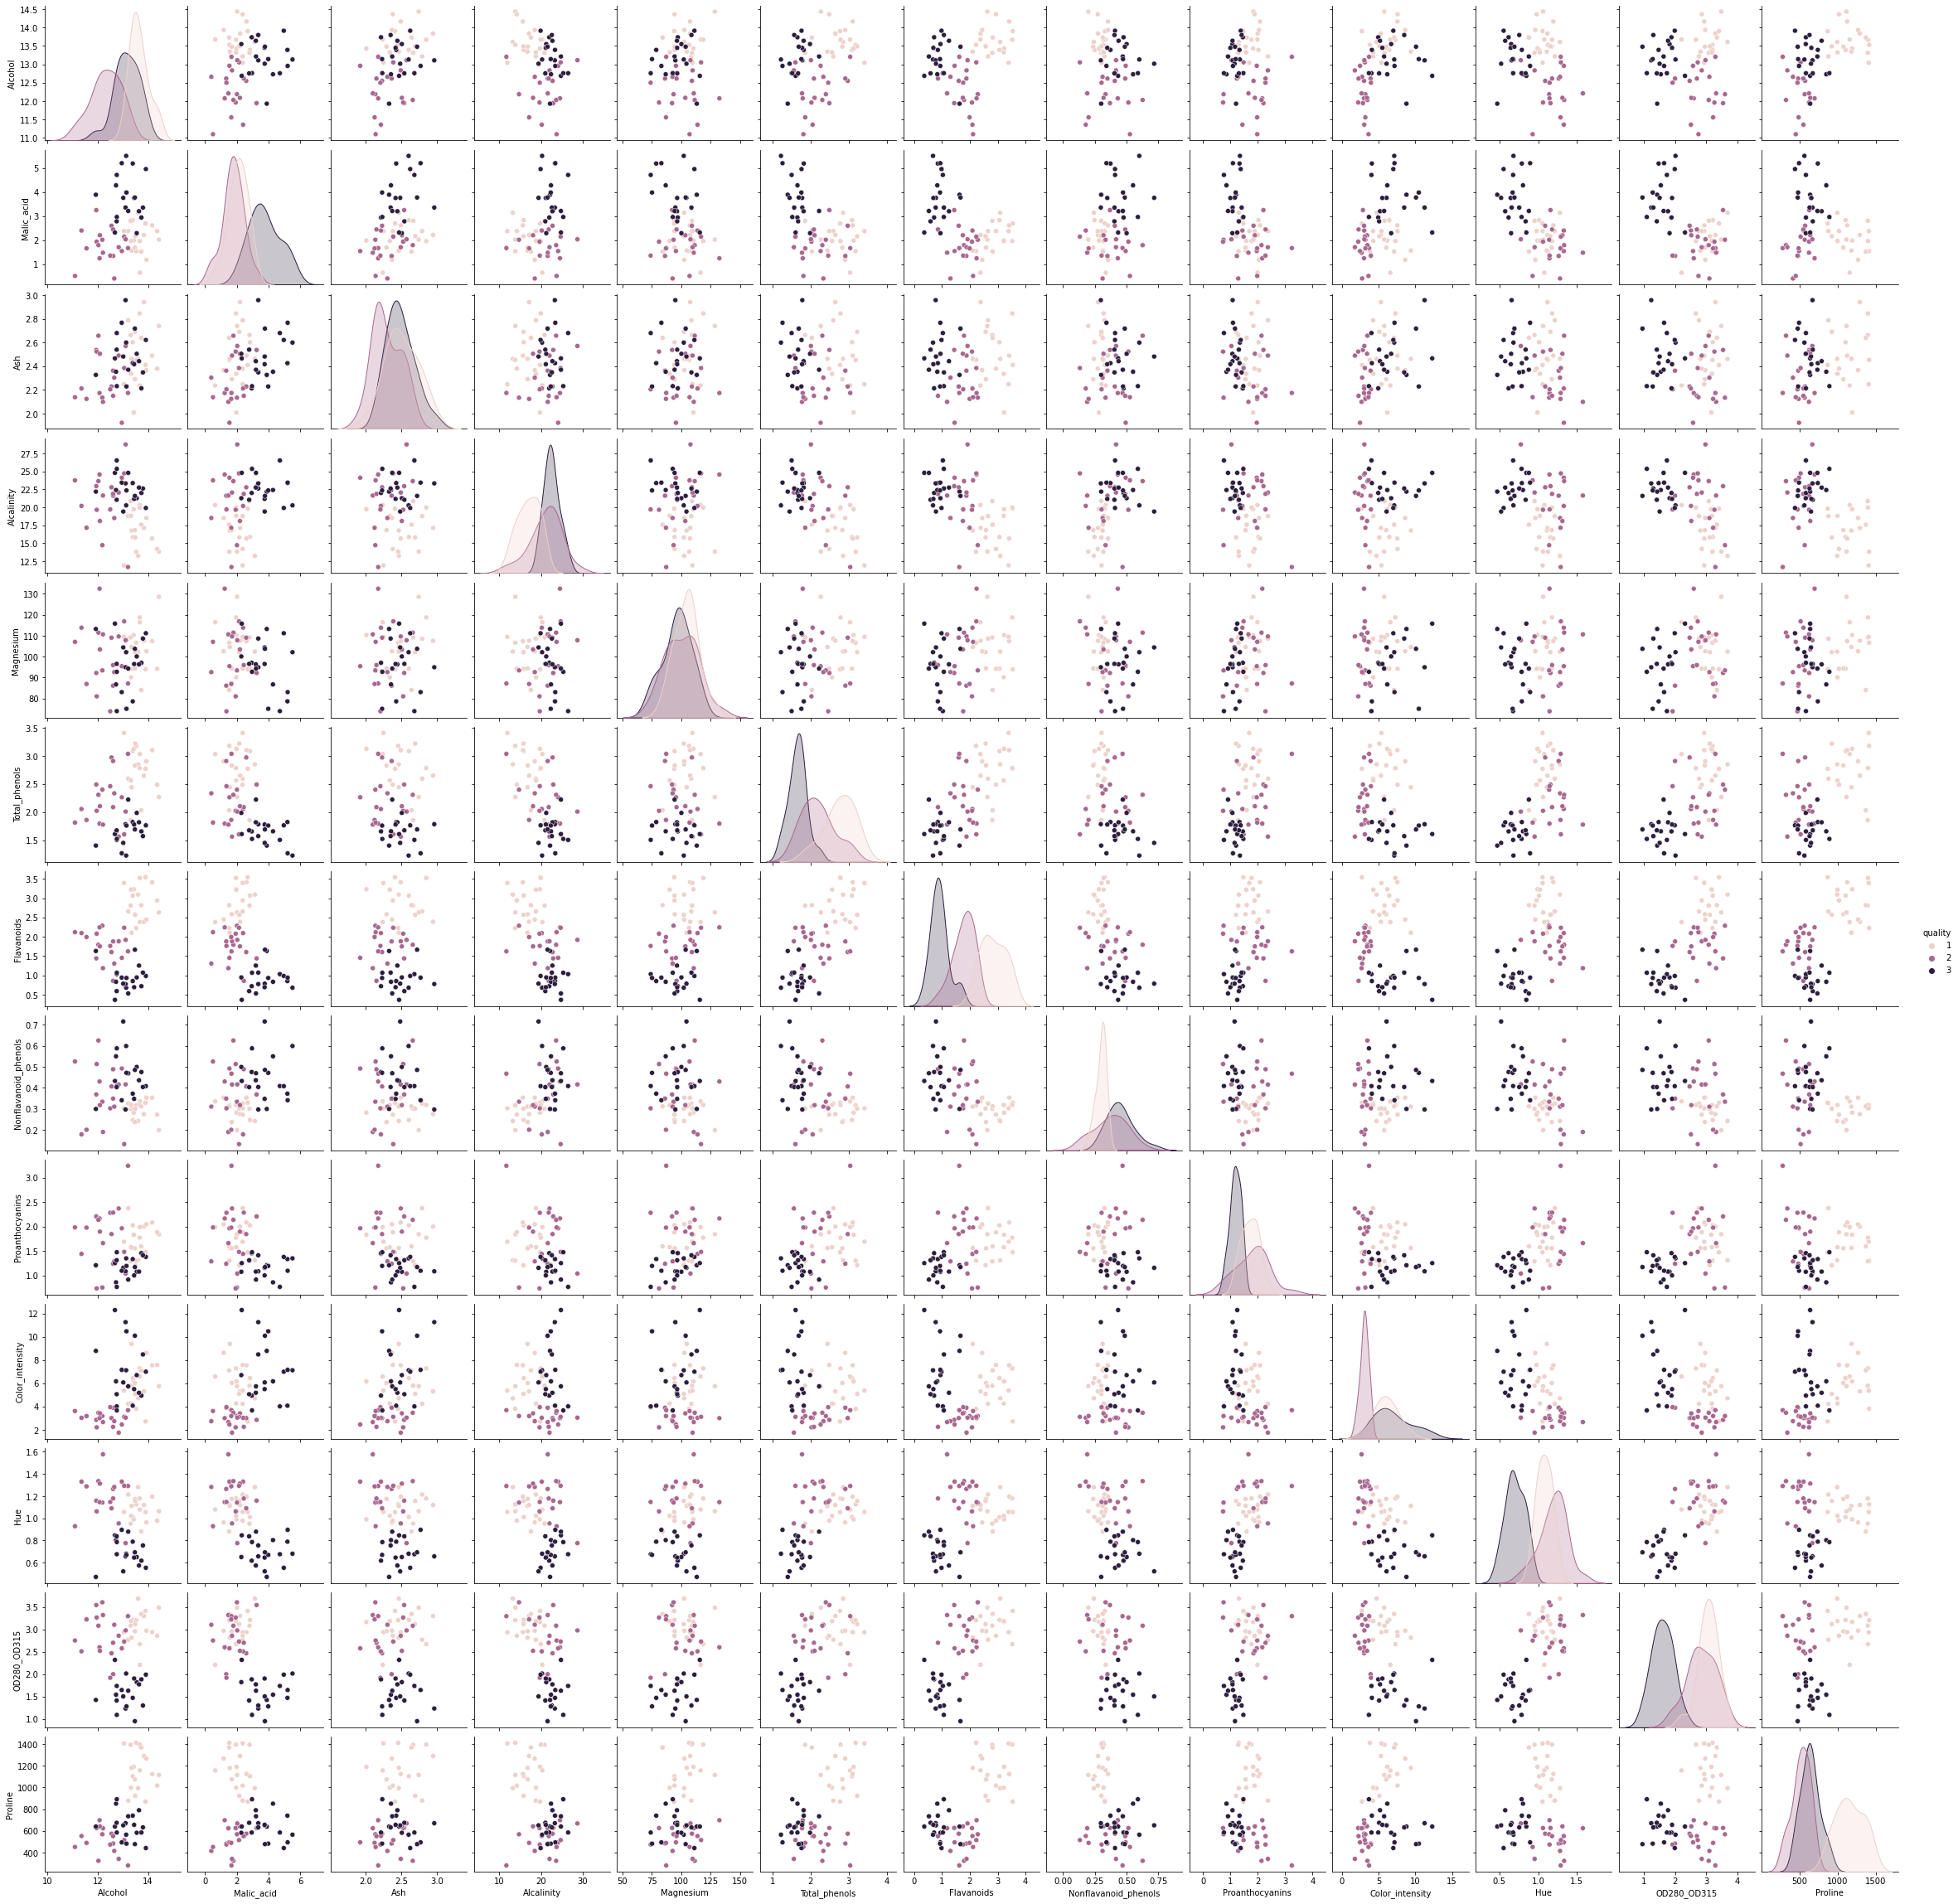

In [33]:
sns.pairplot(data =gnb_df, hue='quality')

This looks pretty close to the actual data, though there is more overlap for the different qualities in each scatter plot. This means that the naive assumption doesn’t hold perfectly on this data.

The parameters do generate similar synthetic data.